2721954


<Axes: >

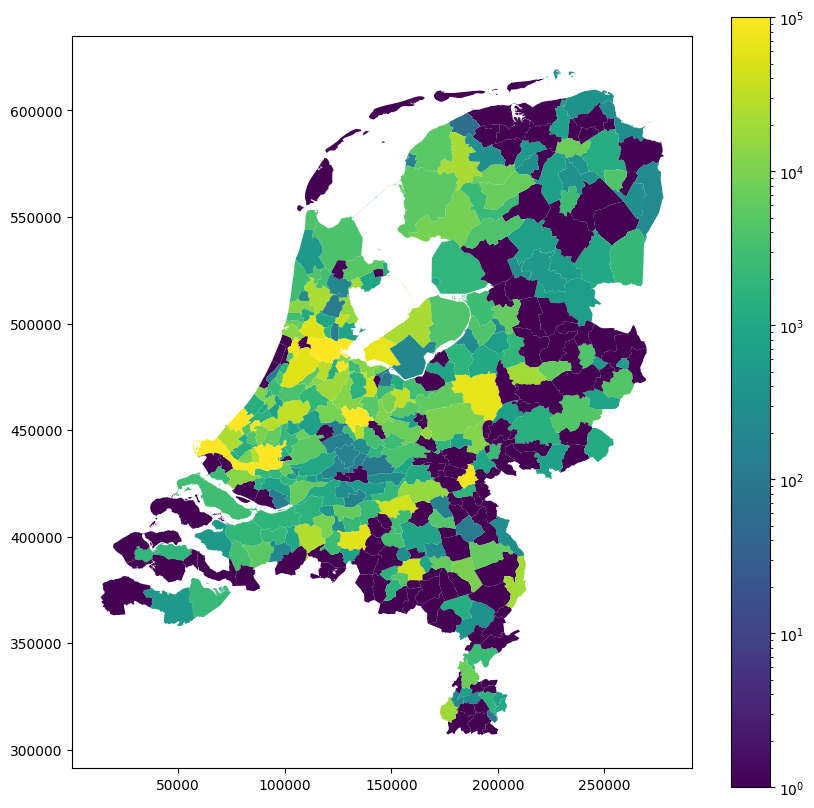

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os

seed = 4
run = 3

path = os.getcwd() + '/Data/Model_V1/Data/High/Seed_' + str(seed)
contact_data = np.load(path + '/Runs_ref_3_3_5/Contacts_' + str(run) + '.npy')
contact_data_per_municipality = np.sum(contact_data, axis=1) + 1

contacts = np.sum(contact_data_per_municipality)
print(contacts)

mapdf = gpd.read_file('Data/NL-geomap/gemeente_2018_v3.shp')
mapdf = mapdf[mapdf["H2O"] == "NEE"]
mapdf.sort_values("GM_NAAM", inplace=True)
mapdf = mapdf.reset_index(drop=True)

mapdf.insert(0, 'CONTACTS', contact_data_per_municipality)
#pd.set_option('display.max_rows', None)
#print(mapdf)

mapdf.plot(column="CONTACTS", figsize=(10,10), legend=True, norm=matplotlib.colors.LogNorm(1,100000))

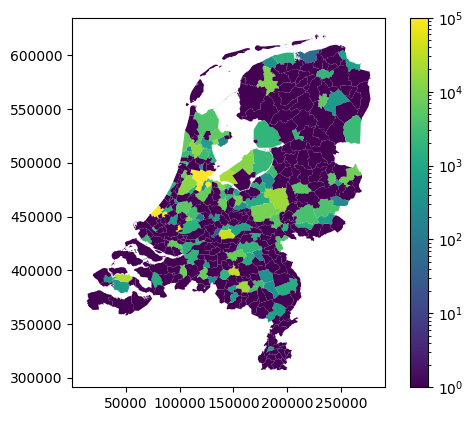

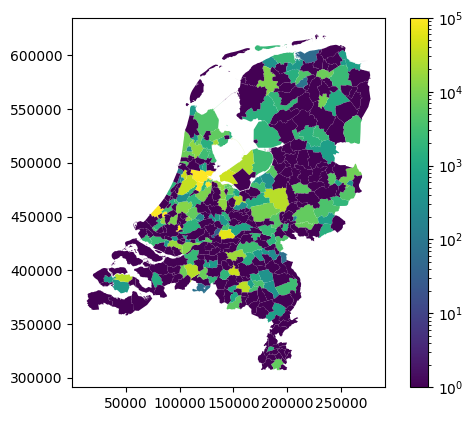

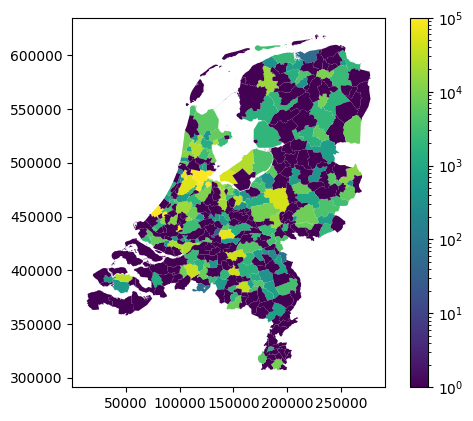

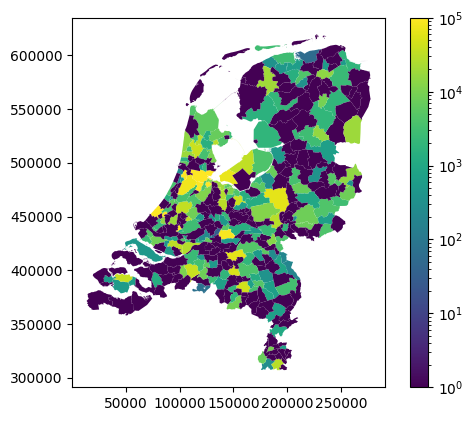

: 

In [21]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os

seed = 4
run = 5

path = os.getcwd() + '/Data/Model_V1/Data/High/Seed_' + str(seed)
contact_data = np.load(path + '/Runs_ref_3_3_5/Contacts_per_agent_' + str(run) + '.npy')

max_time = contact_data.shape[0]
n_agents = contact_data.shape[1]

# compute cumulative contacts per municipality per timestep
municipality_contact_data = np.ones(shape=(max_time, 380))
for t in range(1, max_time):
    municipality_contact_data[t, :] = municipality_contact_data[t - 1, :]
    for p in range(0, n_agents):
        if contact_data[t, p, 1] > 0:
            municipality_contact_data[t, contact_data[t, p, 0]] += 1


# plot the results

mapdf = gpd.read_file('Data/NL-geomap/gemeente_2018_v3.shp')
mapdf = mapdf[mapdf["H2O"] == "NEE"]
mapdf.sort_values("GM_NAAM", inplace=True)
mapdf = mapdf.reset_index(drop=True)

mapdf.insert(0, 'CONTACTS_QUARTER', municipality_contact_data[int(max_time/4)])
mapdf.insert(0, 'CONTACTS_HALF', municipality_contact_data[int(max_time/2)])
mapdf.insert(0, 'CONTACTS_3QUARTER', municipality_contact_data[int(max_time*3/4)])
mapdf.insert(0, 'CONTACTS_MAXTIME', municipality_contact_data[max_time-1])

mapdf.plot(column="CONTACTS_QUARTER", legend=True, norm=matplotlib.colors.LogNorm(1,100000))
mapdf.plot(column="CONTACTS_HALF", legend=True, norm=matplotlib.colors.LogNorm(1,100000))
mapdf.plot(column="CONTACTS_3QUARTER", legend=True, norm=matplotlib.colors.LogNorm(1,100000))
mapdf.plot(column="CONTACTS_MAXTIME", legend=True, norm=matplotlib.colors.LogNorm(1,100000))

plt.show()


19375.0


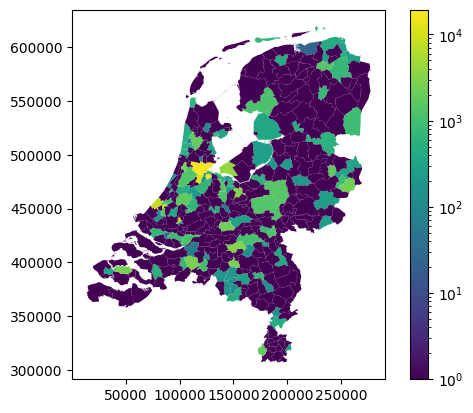

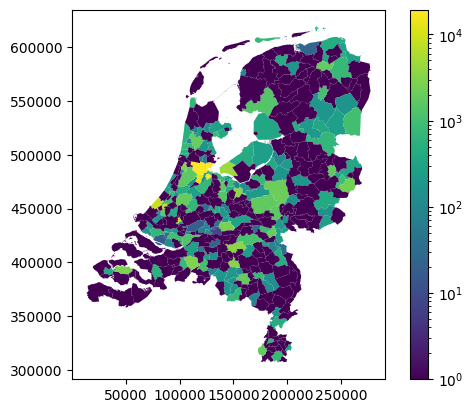

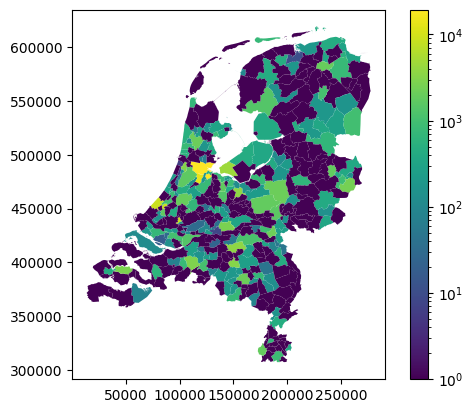

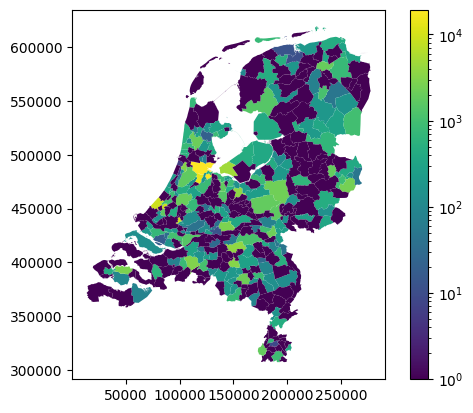

In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os

seed = 4
run = 6

path = os.getcwd() + '/Data/Model_V1/Data/High/Seed_' + str(seed)
contact_data = np.load(path + '/Runs_ref_3_3_5/Contacts_per_agent_' + str(run) + '.npy')

max_time = contact_data.shape[0]
n_agents = contact_data.shape[1]

# compute cumulative contacts per municipality per timestep
municipality_contact_data = np.ones(shape=(max_time, 380))
for t in range(1, max_time):
    for p in range(0, n_agents):
        if contact_data[t, p, 1] > 0:
            municipality_contact_data[t, contact_data[t, p, 0]] += 1


# plot the results

max_val = np.max(municipality_contact_data[max_time-1])
print(max_val)

mapdf = gpd.read_file('Data/NL-geomap/gemeente_2018_v3.shp')
mapdf = mapdf[mapdf["H2O"] == "NEE"]
mapdf.sort_values("GM_NAAM", inplace=True)
mapdf = mapdf.reset_index(drop=True)

mapdf.insert(0, 'CONTACTS_QUARTER', municipality_contact_data[int(max_time/4)])
mapdf.insert(0, 'CONTACTS_HALF', municipality_contact_data[int(max_time/2)])
mapdf.insert(0, 'CONTACTS_3QUARTER', municipality_contact_data[int(max_time*3/4)])
mapdf.insert(0, 'CONTACTS_MAXTIME', municipality_contact_data[max_time-1])

mapdf.plot(column="CONTACTS_QUARTER", legend=True, norm=matplotlib.colors.LogNorm(1,max_val))
mapdf.plot(column="CONTACTS_HALF", legend=True, norm=matplotlib.colors.LogNorm(1,max_val))
mapdf.plot(column="CONTACTS_3QUARTER", legend=True, norm=matplotlib.colors.LogNorm(1,max_val))
mapdf.plot(column="CONTACTS_MAXTIME", legend=True, norm=matplotlib.colors.LogNorm(1,max_val))

plt.show()


20530.0


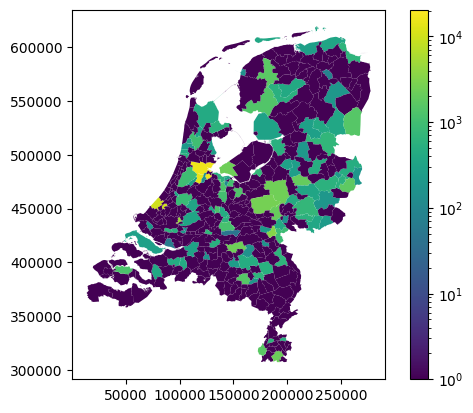

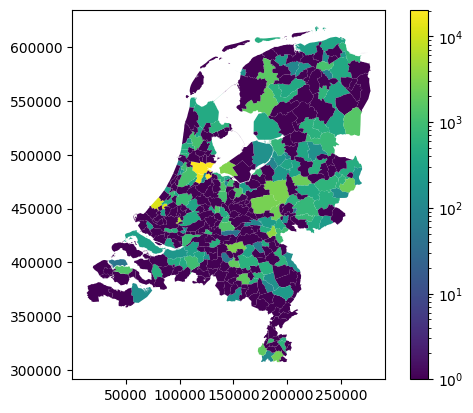

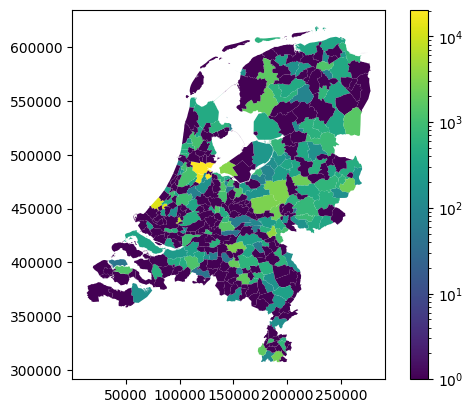

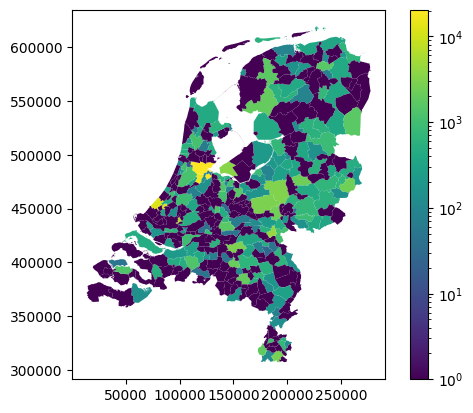

In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os

seed = 4
run = 8

path = os.getcwd() + '/Data/Model_V1/Data/High/Seed_' + str(seed)
contact_data = np.load(path + '/Runs_ref_3_3_5/Contacts_per_agent_' + str(run) + '.npy')

max_time = contact_data.shape[0]
n_agents = contact_data.shape[1]

# compute cumulative contacts per municipality per timestep
municipality_contact_data = np.ones(shape=(max_time, 380))
for t in range(1, max_time):
    for p in range(0, n_agents):
        if contact_data[t, p, 1] > 0:
            municipality_contact_data[t, contact_data[t, p, 0]] += 1


# plot the results

max_val = np.max(municipality_contact_data[max_time-1])
print(max_val)

mapdf = gpd.read_file('Data/NL-geomap/gemeente_2018_v3.shp')
mapdf = mapdf[mapdf["H2O"] == "NEE"]
mapdf.sort_values("GM_NAAM", inplace=True)
mapdf = mapdf.reset_index(drop=True)

mapdf.insert(0, 'CONTACTS_QUARTER', municipality_contact_data[int(max_time/4)])
mapdf.insert(0, 'CONTACTS_HALF', municipality_contact_data[int(max_time/2)])
mapdf.insert(0, 'CONTACTS_3QUARTER', municipality_contact_data[int(max_time*3/4)])
mapdf.insert(0, 'CONTACTS_MAXTIME', municipality_contact_data[max_time-1])

mapdf.plot(column="CONTACTS_QUARTER", legend=True, norm=matplotlib.colors.LogNorm(1,max_val))
mapdf.plot(column="CONTACTS_HALF", legend=True, norm=matplotlib.colors.LogNorm(1,max_val))
mapdf.plot(column="CONTACTS_3QUARTER", legend=True, norm=matplotlib.colors.LogNorm(1,max_val))
mapdf.plot(column="CONTACTS_MAXTIME", legend=True, norm=matplotlib.colors.LogNorm(1,max_val))

plt.show()
